**Imports**

In [159]:
 # PIL: Python image library
from PIL import Image
# numpy: standard python library for numbers/math functions 
import numpy as np
# pandas: lets us use dataframes to work with data (excel spreadsheet as code object)
import pandas as pd

**Global Variables**

In [160]:
# Set default values
# Only need to change cur_sample to match the sample you're using
cur_sample = "lithothrix"
cur_actual_pix = 0
cur_theshold = 0

lithothrix_actual_pixels = 7524 #221644
lithothrix_threshold = 58

laurencia_csp_actual_pixels = 1169
laurencia_csp_threshold = 0

laurencia_cssa_actual_pixels = 2069
laurencia_cssa_threshold = 12

plocamium_threshold = 0

**Function Definitions**

In [171]:
# count_bw_pixels: Takes in a converted to black/white PIL image object and 
# either black or white. Counts and returns the number of pixels of 
# the given color in the image.
def count_bw_pixels(img, color):
    array_img = np.array(img)
    count = 0
    # Set which color to search for
    check = True
    if color == 'black':
        check = False
    # Loop through each row and its values in the array. If the value
    # matches the color we want, increase count 
    for row in array_img:
        for val in row:
            if val == check:
                count = count + 1
    return count

# Given measured and actual values, returns percent error
def calc_perc_error(measured, actual):
    return abs(round((measured - actual) / actual * 100, 3))

**Main Code**

**PRE-PROCESSING:** Load Image

In [172]:
# Load Image as Object
if cur_sample == "lithothrix":
    # Lithothrix Example/Test
    ex_img = Image.open('./black-white_photos/BW - Lithothrix.aspergillum_SC_P_SA_8Mar2024_3.jpg')
    test_img = Image.open('./cropped_photos/Lithothrix.aspergillum_SC_P_SA_8Mar2024_3_cropped.jpg')
    cur_threshold = lithothrix_threshold
    cur_actual_pix = lithothrix_actual_pixels

elif cur_sample == "laurencia_csp":
    # Laurencia CSP Example/Test
    ex_img = Image.open('./black-white_photos/BW - Laurencia.pacifica_CS_P_19Feb2024_1.jpg')
    test_img = Image.open('./cropped_photos/Laurencia.pacifica_CS_P_19Feb2024_1_cropped.png')
    cur_threshold = laurencia_csp_threshold
    cur_actual_pix = laurencia_csp_actual_pixels

elif cur_sample == "laurencia_cssa":
    # Laurencia CSSA Example/Test
    ex_img = Image.open('./black-white_photos/BW - Laurencia.pacifica_CS_SA_19Feb2024_1.jpg')
    test_img = Image.open('./cropped_photos/Laurencia.pacifica_CS_SA_19Feb2024_1_cropped.png')
    cur_threshold = laurencia_cssa_threshold
    cur_actual_pix = laurencia_cssa_actual_pixels
    
elif cur_sample == "plocamium":
    # Plocamium Test
    test_img = Image.open('./cropped_photos/Plocamium.pacificum_LC_P_SA_26Jan2024_2_cropped.JPG')
    cur_threshold = plocamium_threshold

**TRAINING:** Calculate Number of Target Pixels in Example Image

In [173]:
try:
    pix_ex = count_bw_pixels(ex_img, 'white')
    print("Target Pixels in Example %s Image: %s" % (cur_sample, pix_ex))
except:
    print("No example image given for %s" % cur_sample)

Target Pixels in Example lithothrix Image: 7524


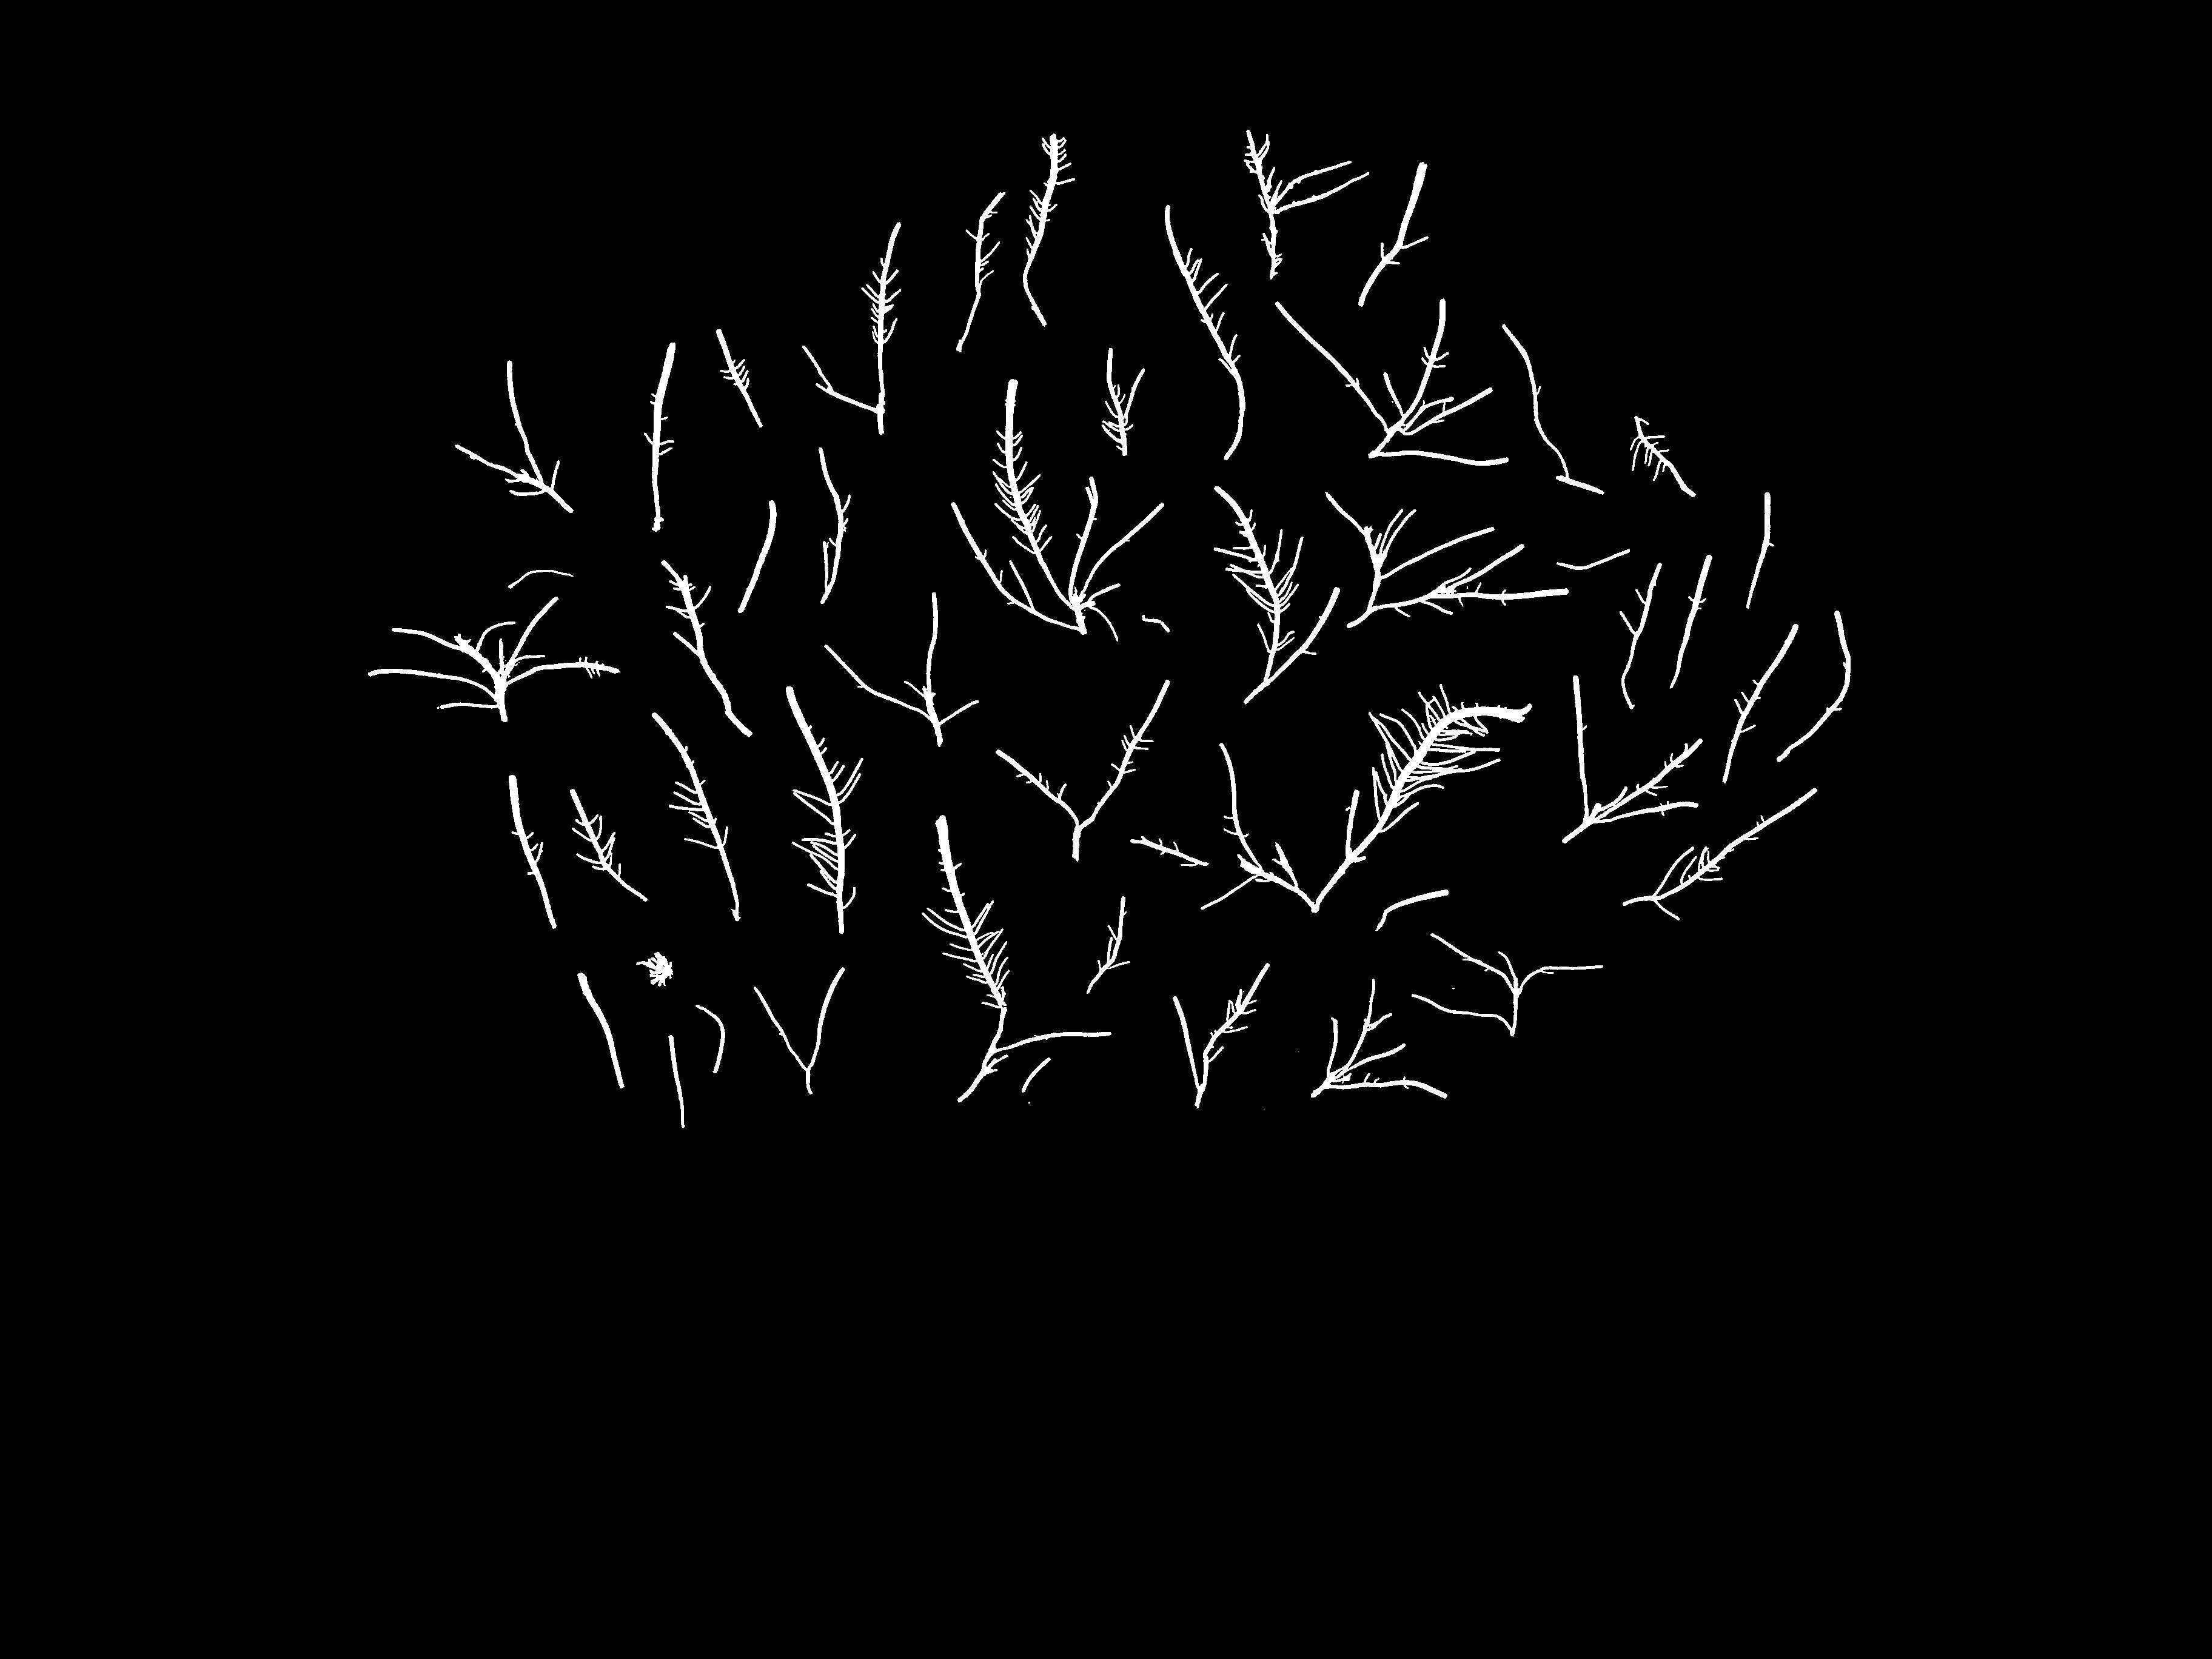

In [169]:
display(ex_img)

**TRAINING:** Determining Best Threshold Value

In [165]:
# Create list of available thresholds 0-255
thresholds = list(range(0, 256))
performance_dict = {'Threshold': thresholds, 'Pixels': [], 'Percent_Error': []}

# Convert to black/white using threshold
for ind, cur_thresh in enumerate(thresholds):
    bw_img = test_img.convert('L').point(lambda x: 255 if x < cur_thresh else 0, mode='1')
    pix = count_bw_pixels(bw_img, 'white')
    performance_dict['Pixels'].append(pix)
    performance_dict['Percent_Error'].append(calc_perc_error(pix, cur_actual_pix))

    # If we have twice as many chosen pixels as we should have, stop the loop since it's
    # far outside the appropriate range
    if performance_dict['Percent_Error'][ind] > 100:
        break

# Since we'll most likely stop populating performance_dict before using
# all 256 thresholds, remove the extra values from the thresholds in performance_dict
vals = len(performance_dict['Percent_Error'])
del performance_dict['Threshold'][vals:]
# Convert to Dataframe
performance_df = pd.DataFrame.from_dict(performance_dict)

KeyboardInterrupt: 

In [ ]:
# Get the index of the smallest percent error
best_val_idx = performance_df['Percent_Error'].idxmin()
# Show the dataframe around our best value
print(performance_df.iloc[best_val_idx-2:best_val_idx+3])
# print(performance_dict)

    Threshold  Pixels  Percent_Error
56         56  219520          0.958
57         57  220460          0.534
58         58  221354          0.131
59         59  222309          0.300
60         60  223240          0.720


**Evaluation:** View Black/White Filtered Image

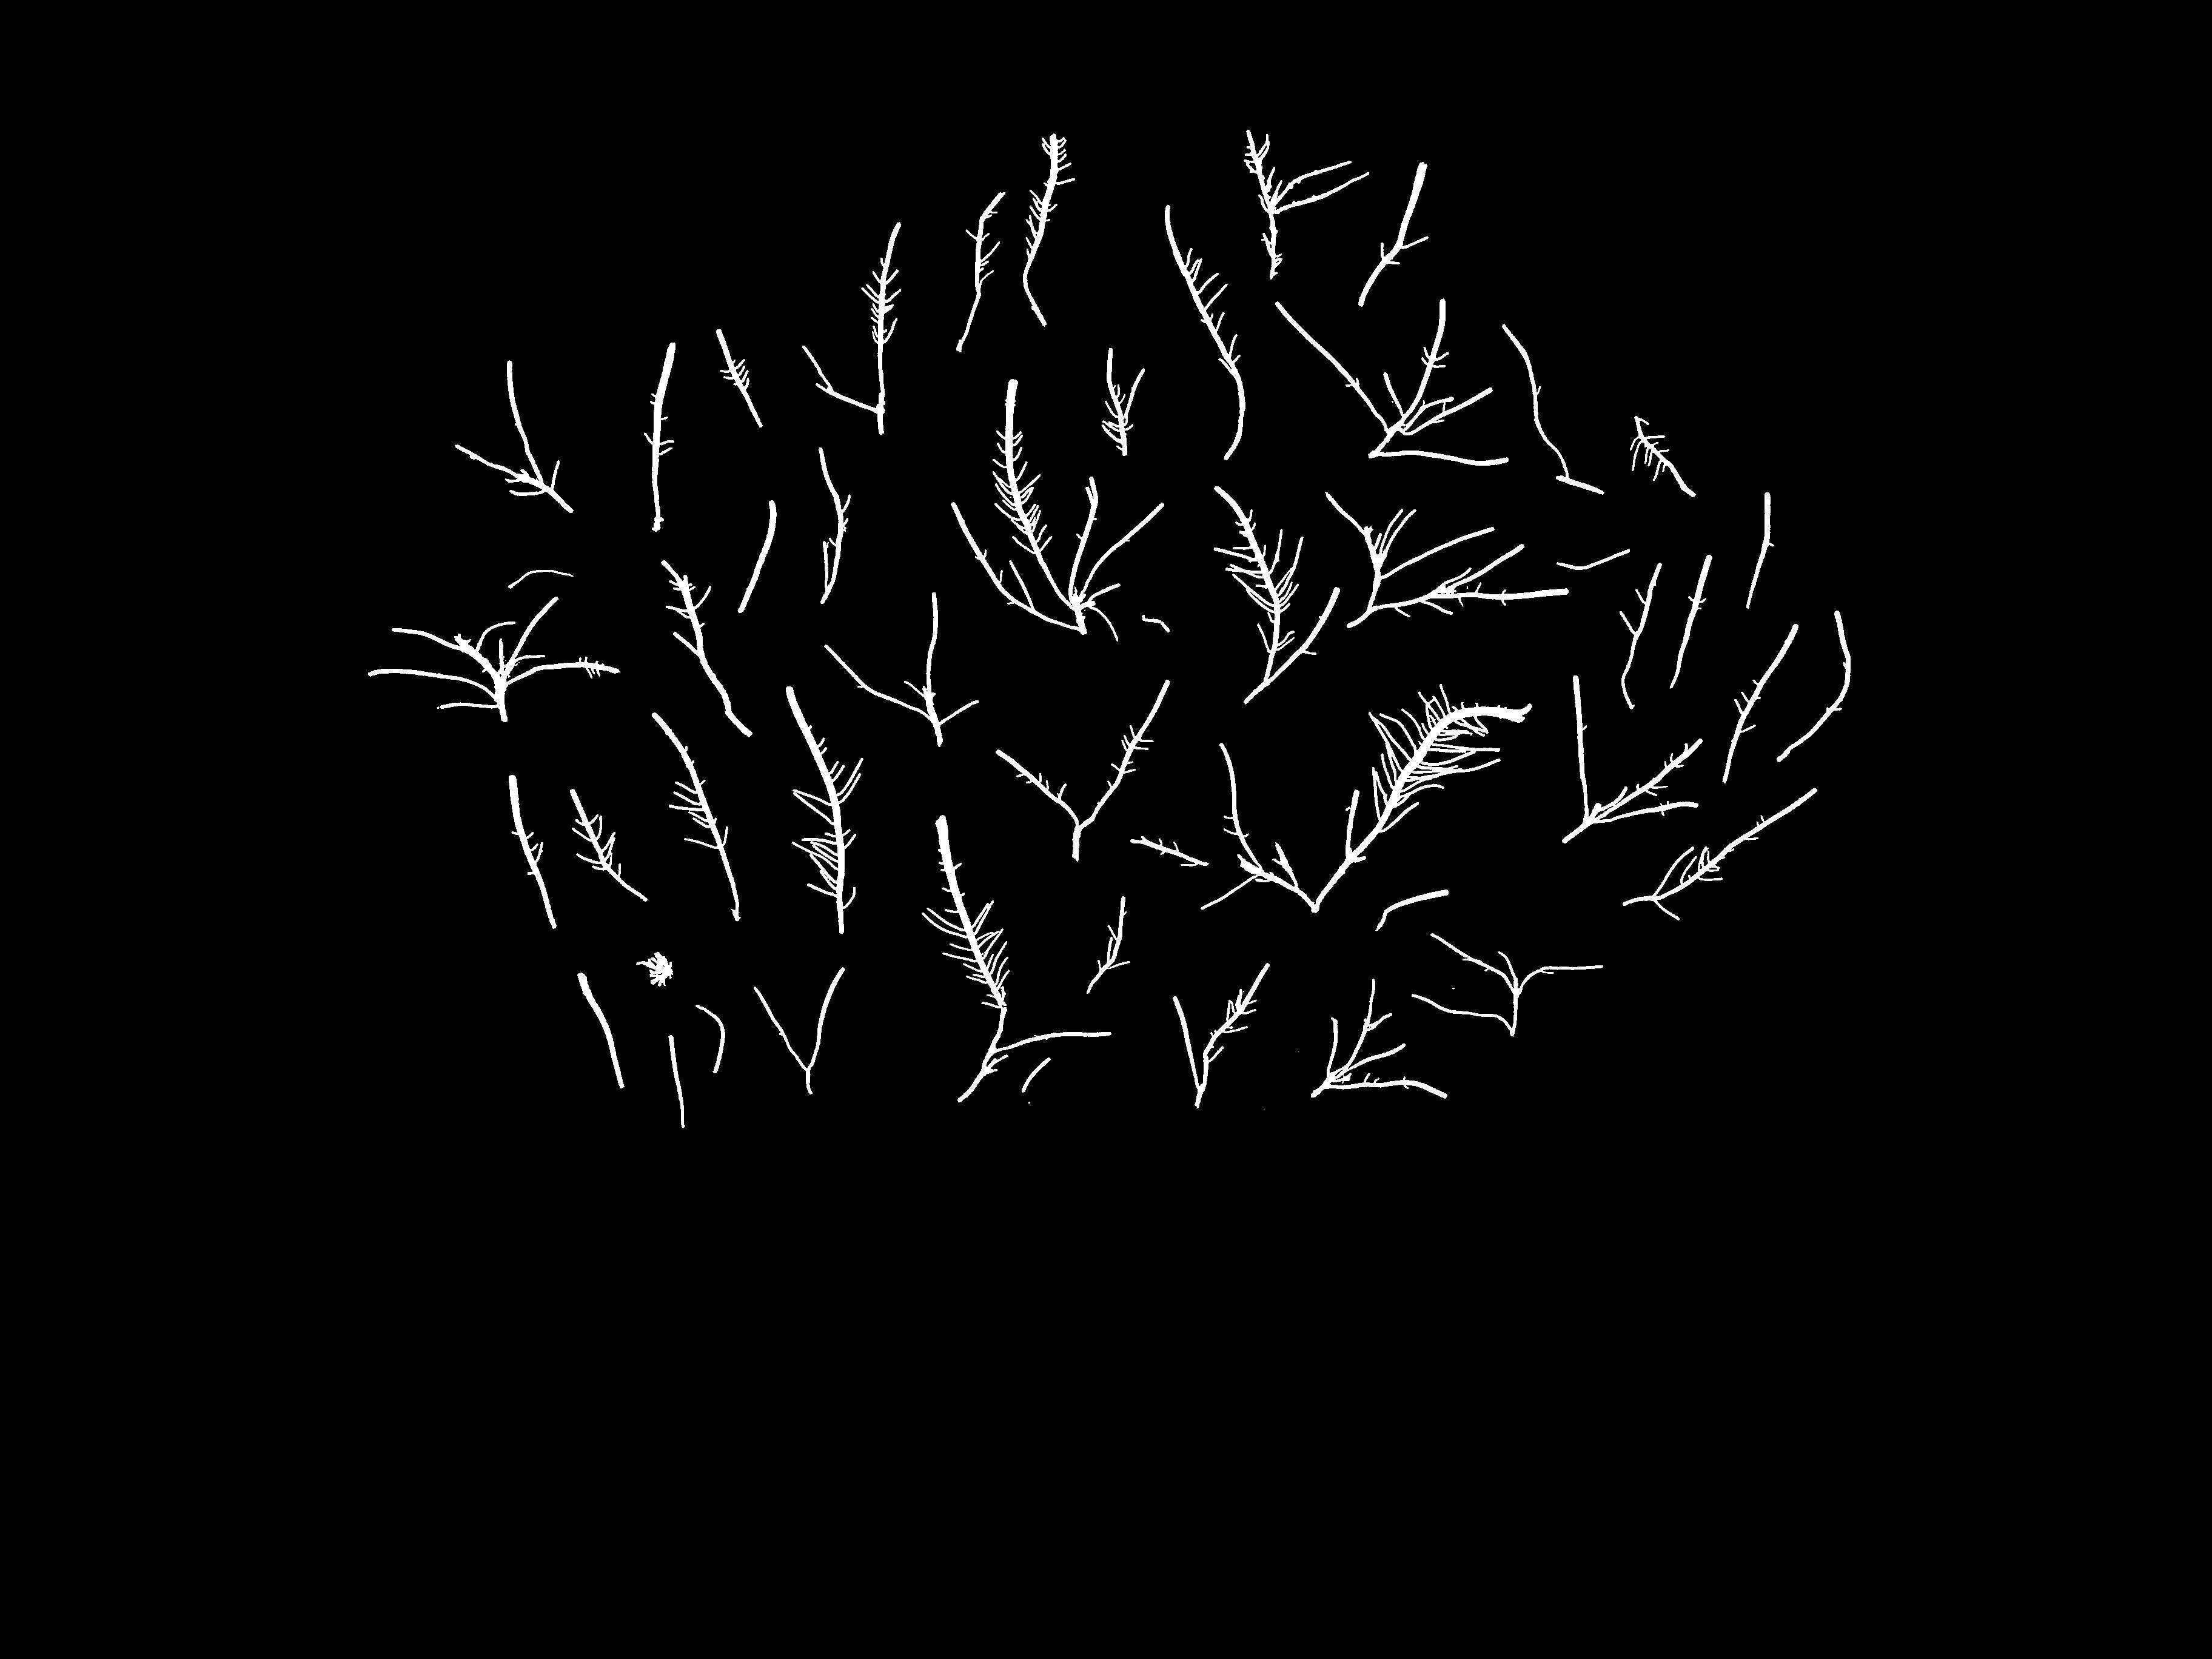

7524


In [176]:
bw_img = ex_img.convert('L').point(lambda x: 255 if x < cur_threshold else 0, mode='1')
display(ex_img)
print(count_bw_pixels(ex_img, 'white'))